In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

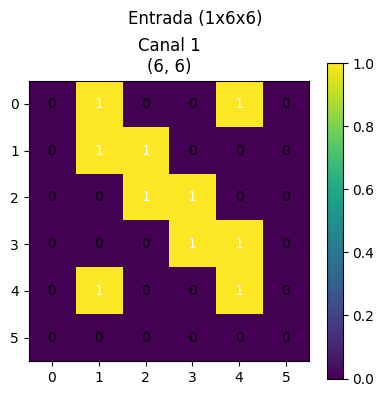

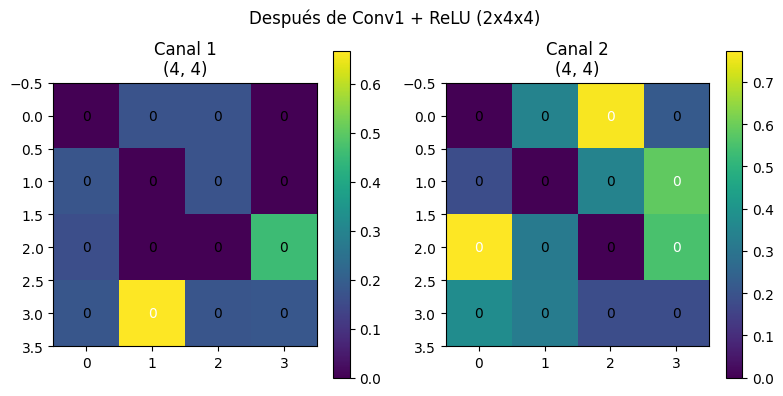

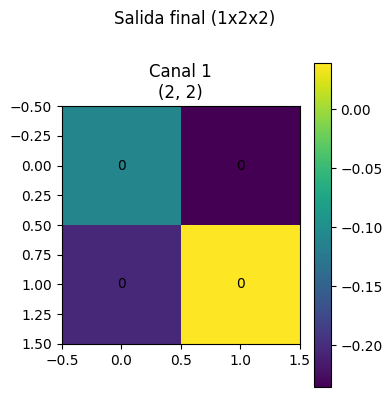


Dimensiones en cada capa:
Entrada: torch.Size([1, 1, 6, 6])
Después de Conv1 + ReLU: torch.Size([1, 2, 4, 4])
Salida final: torch.Size([1, 1, 2, 2])


In [7]:
# Definimos una CNN muy simple
class MiniCNN(nn.Module):
    def __init__(self):
        super(MiniCNN, self).__init__()
        # Primera capa convolucional
        # Input: 1x6x6, Output: 2x4x4
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3)
        # Segunda capa convolucional
        # Input: 2x4x4, Output: 1x2x2
        self.conv2 = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=3)
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Activación ReLU después de conv1
        x = self.conv2(x)              # Segunda convolución
        return x

# Crear una entrada de ejemplo (1 imagen en escala de grises de 6x6)
input_image = torch.tensor([
    [0, 1, 0, 0, 1, 0],
    [0, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0]
], dtype=torch.float32).view(1, 1, 6, 6)

# Crear y aplicar el modelo
model = MiniCNN()
output = model(input_image)

# Función para visualizar las dimensiones y activaciones
def visualize_layer(tensor, title):
    # Convertir tensor a numpy y quitar dimensiones extras
    if len(tensor.shape) == 4:
        img = tensor.detach().numpy()[0]  # Primer batch
    else:
        img = tensor.detach().numpy()
        
    n_channels = img.shape[0]
    fig, axes = plt.subplots(1, n_channels, figsize=(n_channels*4, 4))
    
    if n_channels == 1:
        axes = [axes]
    
    for i, ax in enumerate(axes):
        im = ax.imshow(img[i], cmap='viridis')
        ax.set_title(f'Canal {i+1}\n{img[i].shape}')
        
        # Añadir valores numéricos en cada celda
        for y in range(img[i].shape[0]):
            for x in range(img[i].shape[1]):
                value = img[i][y, x]
                # Ajustar el color del texto según el valor de fondo
                color = 'white' if value > 0.5 else 'black'
                # Formatear el valor con 2 decimales si es float
                text = f'{value:.2f}' if isinstance(value, float) else str(int(value))
                ax.text(x, y, text, 
                       ha='center', va='center', 
                       color=color, fontsize=10)
        
        plt.colorbar(im, ax=ax)
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Visualizar entrada
visualize_layer(input_image, 'Entrada (1x6x6)')

# Obtener activaciones intermedias
with torch.no_grad():
    # Primera capa conv + ReLU
    conv1_out = torch.relu(model.conv1(input_image))
    visualize_layer(conv1_out, 'Después de Conv1 + ReLU (2x4x4)')
    
    # Segunda capa conv
    conv2_out = model.conv2(conv1_out)
    visualize_layer(conv2_out, 'Salida final (1x2x2)')

# Imprimir las dimensiones en cada capa
print("\nDimensiones en cada capa:")
print(f"Entrada: {input_image.shape}")
print(f"Después de Conv1 + ReLU: {conv1_out.shape}")
print(f"Salida final: {conv2_out.shape}")